The following neural network was designed to predict the presence of diabetes. The dataset for training was obtained from Kaggle(https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

The content of the database includes:
1.   Pregnancies: Number of times pregnant
2.   Glucose: Plasma glucose concentration a 2 hours in an oral glucose
     tolerance test
3.   BloodPressure: Diastolic blood pressure (mm Hg)
4.   SkinThickness: Triceps skin fold thickness (mm)
5.   Insulin: 2-Hour serum insulin (mu U/ml)
6.   BMI: Body mass index (weight in kg/(height in m)^2)
7.   DiabetesPedigreeFunction: Diabetes pedigree function
8.   Age: Age (years)
9.   Outcome: Class variable (0 or 1)






In [178]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [179]:
df= pd.read_csv('/content/diabetes.csv')

In [180]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age. Lowest correlation for blood pressure.

Correlation with target Outcome:
 BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [181]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [182]:
if isinstance(df, pd.DataFrame):
  print("The loaded data is a DataFrame")
else:
  print("The loaded data is not a DataFrame")

The loaded data is a DataFrame


In [183]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

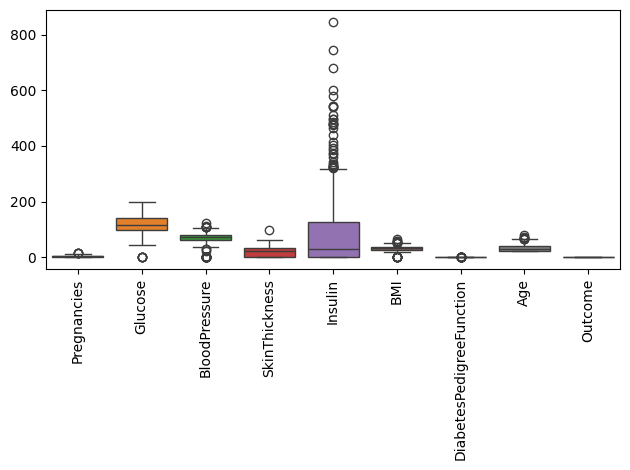

In [184]:
import seaborn as sns
sns.boxplot(data=df)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [185]:
print(f"shape of X_train, {df.shape}")

shape of X_train, (768, 9)


In [186]:
df = df.drop('BloodPressure', axis=1) #removing bloodpressure column because of low correlation


In [187]:
df= df.drop('SkinThickness', axis=1)#removing skin thickness column because of low correlation

In [188]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [189]:
df.info()
 #shows zero null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [190]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [191]:
# Code for mean imputation. No need to perform here as NO MISSING VALUES

#from sklearn.impute import SimpleImputer

#df.replace('?', np.nan, inplace=True) #replacing ? in dataset with NaN (Not a number) value which is compatible with pandas. Later NaN value will be imputed with mean value
#inplace=True directly modifies the current df insteaf of creating a copy of it and then modifying

# Handling missing values with mean imputation
#imputer = SimpleImputer(strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) #columns argument to have same column names as the original df


In [192]:
missing_values = df.isnull().sum()

print("Missing values count:\n", missing_values)

Missing values count:
 Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [193]:
X_n= df.iloc[:,:-1] #This line creates a new DataFrame X containing all the rows and all columns except the last column from the DataFrame df. Essentially, it's selecting all the features (independent variables) and excluding the 'Price' column.
Y_n = df['Outcome']

In [194]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age.


Correlation with target Outcome:
 Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


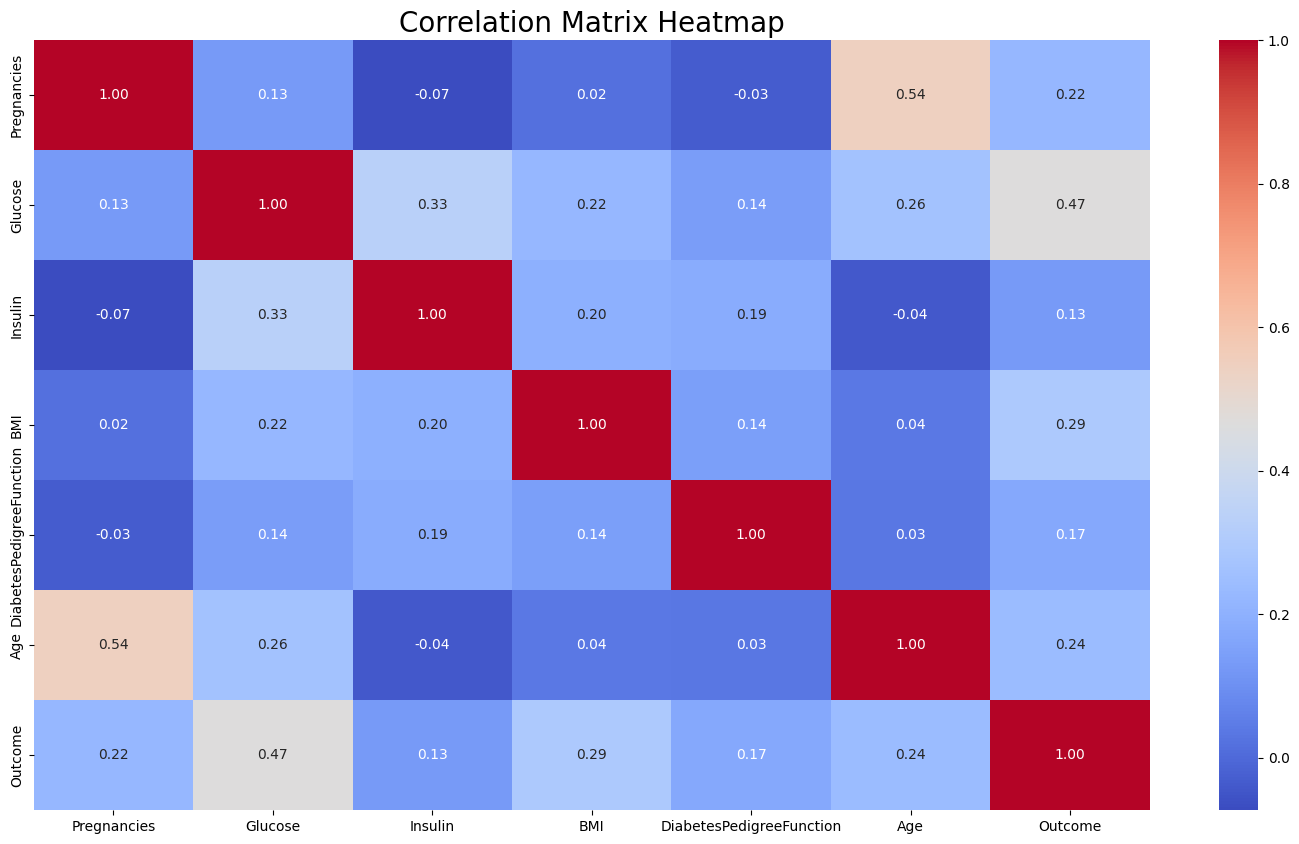

In [195]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #uses seaborn (sns) library, annot helps to display correlaton value with the each cells itself
#fmt=.2f is for displaying values with 2 decimal places
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

In [196]:
x_train,X_, y_train, y_= train_test_split(X_n,Y_n, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_

print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (460, 6)
shape of X_test, (154, 6)
shape of X_cv, (154, 6)
shape of y_train (target), (460,)
shape of y_test (target), (154,)
shape of y_cv (target), (154,)


In [197]:
x_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,0,0.0,0.256,25
9,8,125,0,0.0,0.232,54
249,1,111,0,30.1,0.143,23
22,7,196,0,39.8,0.451,41
221,2,158,0,31.6,0.805,66


In [198]:
y_train.head()

,Outcome
426,0
9,1
249,0
22,1
221,1


In [199]:
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()


x_train_nor = scaler.fit_transform(x_train) # Normalizing our data. Also scaling functions convert df to numpy arrays
x_test_nor = scaler.transform(x_test)
x_cv_nor = scaler.transform(x_cv)

print(x_train_nor) # Print the normalized data

[[-1.15089159 -0.86604199 -0.69247754 -4.23580399 -0.62318423 -0.68917954]
 [ 1.30008124  0.10264252 -0.69247754 -4.23580399 -0.69179919  1.79962799]
 [-0.84451998 -0.33482791 -0.69247754 -0.24830436 -0.94624635 -0.86082143]
 ...
 [ 1.91282444 -0.64730678 -0.69247754  1.80505924  1.89269781  0.4264928 ]
 [-1.15089159  0.60260872 -0.69247754  1.38113901 -0.76899103 -0.34589574]
 [-1.15089159  0.10264252 -0.69247754 -1.2551149  -0.60603049 -1.03246333]]


In [200]:
print(f"Computed mean of the training set: {scaler.mean_}")
print(f"Computed standard deviation of the training set: {scaler.scale_}")

Computed mean of the training set: [  3.75652174 121.71521739  80.53913043  31.97434783   0.47397609
  33.03043478]
Computed standard deviation of the training set: [  3.26401008  32.00216343 116.30576545   7.54859004   0.34977793
  11.65216661]


In [201]:
x_train_nor.shape

(460, 6)

In [202]:
x_train_nor_df= pd.DataFrame(x_train_nor) # scaling functions convert df to numpy arrays, so convert back to dataframe
x_train_nor_df.describe()

,0,1,2,3,4,5
count,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02
mean,1.544658e-17,-5.020139e-17,4.633974e-17,-3.089316e-16,7.144044e-17,1.969439e-16
std,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00
min,-1.150892e+00,-3.803343e+00,-6.924775e-01,-4.235804e+00,-1.132079e+00,-1.032463e+00
25%,-8.445200e-01,-7.098026e-01,-6.924775e-01,-6.490415e-01,-6.574917e-01,-7.750005e-01
50%,-2.317768e-01,-1.160927e-01,-3.313604e-01,3.398274e-03,-2.672441e-01,-3.458957e-01
75%,6.873380e-01,5.713608e-01,4.188173e-01,5.995361e-01,4.096139e-01,6.839557e-01
max,4.057426e+00,2.414986e+00,6.581452e+00,3.633215e+00,5.563598e+00,4.116794e+00


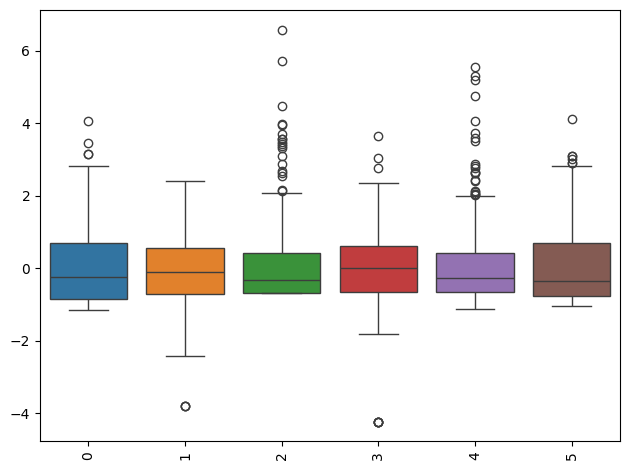

In [203]:
import seaborn as sns
sns.boxplot(data= x_train_nor)

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [236]:
np.random.seed(42) #this seeding is done to fix the intialization at same point everytime we run the code fro first

tf.random.set_seed(42)


In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential([

    Dense (15, activation ='relu', name = 'L1', kernel_regularizer=l2(0.01), input_shape=x_train_nor.shape[1:]), #This part extracts all dimensions except the first one (which is typically the batch size).If your x_train_nor has the shape (1000, 32), where 1000 is the number of samples and 32 is the number of features, then x_train_nor.shape[1:] would be (32,).

    Dense (1, activation ='relu', name = 'L3')   #no. of neurons in o/p layer shd be same as no. of class to compute prob(Y/given=1,2,3...9)
])

In [221]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [251]:
from tensorflow.keras.metrics import Recall # Import Recall

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy', Recall()]) #Accuracy = (True Positives + True Negatives) / (Total Predictions)
history= model.fit(x_train_nor, y_train, epochs= 30, validation_data=(x_cv_nor, y_cv))

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7813 - loss: 0.1637 - recall_13: 0.6220 - val_accuracy: 0.7597 - val_loss: 0.1775 - val_recall_13: 0.6400
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7806 - loss: 0.1612 - recall_13: 0.6190 - val_accuracy: 0.7792 - val_loss: 0.1760 - val_recall_13: 0.6400
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7788 - loss: 0.1611 - recall_13: 0.6141 - val_accuracy: 0.7792 - val_loss: 0.1754 - val_recall_13: 0.6400
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7810 - loss: 0.1608 - recall_13: 0.6141 - val_accuracy: 0.7727 - val_loss: 0.1750 - val_recall_13: 0.6400
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.1605 - recall_13: 0.6171 - val_accuracy: 0.7727 - val_loss: 0.1747 - val_recall_13: 0.6400
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7814 - loss: 0.1601 - recall_13: 0.6151 - val_accuracy: 0.7727 - val_loss: 0.1744 - 

I chose the best values for hyper parameters that give the lowest loss, and best accuracy/recall after experimenting with multiple sets of hyper paramter values


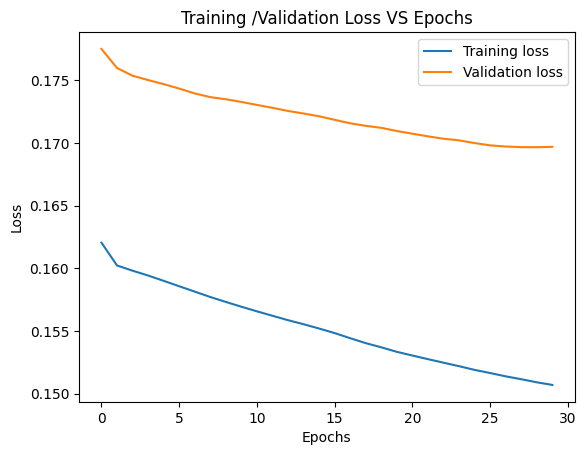

In [252]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training /Validation Loss VS Epochs')
plt.show()

In [253]:
test= model.evaluate(x_test_nor, y_test) #evaluating the model using test set

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.1905 - recall_13: 0.5776 


Just checking the model performance using some training dataset values

In [256]:
X_new= x_test_nor[10:100] #testing the model with some values from training set.



y_pred= model.predict(X_new)


k=0
for i in range(len(X_new)):
  print(f"sample{i+1}")
  print (f"predicted: {y_pred[i]}")
  print (f"actual: {y_test.iloc[i]}") # Use .iloc to access by position since y_test is a dataframe and not a list. so iloc access the element at the index [] mentioned
  if y_pred[i] <= 0.5 and y_test.iloc[i] == 0:
        print("The patient is Non-Diabetic")
        print()
  if y_pred[i]> 0.5 and y_test.iloc[i] == 1:
        print("The patient is Diabetic")
        print()
  if (y_pred[i] > 0.5 and y_test.iloc[i] == 0) or (y_pred[i]<= 0.5 and y_test.iloc[i] == 1):
        print("wrong prediction")
        k= k+1
        print()

print(f"no. of wrong predictions:{k}")
p= (k/len(X_new))*100
print(f"percentage of wrong preditions: {p}")










3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
sample1
predicted: [0.56047446]
actual: 0
wrong prediction

sample2
predicted: [0.]
actual: 0
The patient is Non-Diabetic

sample3
predicted: [0.57634854]
actual: 0
wrong prediction

sample4
predicted: [0.]
actual: 1
wrong prediction

sample5
predicted: [0.20951214]
actual: 1
wrong prediction

sample6
predicted: [0.89767367]
actual: 1
The patient is Diabetic

sample7
predicted: [0.43276155]
actual: 0
The patient is Non-Diabetic

sample8
predicted: [0.36622232]
actual: 1
wrong prediction

sample9
predicted: [0.03762439]
actual: 0
The patient is Non-Diabetic

sample10
predicted: [0.873463]
actual: 1
The patient is Diabetic

sample11
predicted: [0.12585278]
actual: 0
The patient is Non-Diabetic

sample12
predicted: [0.7077368]
actual: 0
wrong prediction

sample13
predicted: [0.72027355]
actual: 1
The patient is Diabetic

sample14
predicted: [0.10200273]
actual: 0
The patient is Non-Diabetic

sample15
predicted: [0.3157826]
actual: 0
The patient is Non

In [212]:
len(x_test_nor)

154